In [2]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

### Homework 1

Try to do it by hands first(at least for the first term) then check with/ use wolframalpha.

Find 3-rd derivative: just type ` d^3/dx^3 tan(x)` or `d^3/dx^3 tan(x) at x =10`

If you need to taylor series, just type `taylor cos(x) at x = 0`.



1) Plot $\cos(x)$ from $-\pi$ to $\pi$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same graph.

$
x=0\\
f(x) = cos(x) \to \ a_{0} = 1\\
f'(x) = -sin(x) \to \ a_{1}= 0\\
f''(x) = -cos(x) \to \ a_{2}=-1\\
f^3(x) = sin(x) \to \ a_{3} = 0\\
f^4(x) = cos(x) \to \ a_{4} = 1\\
f^5(x) = -sin(x) \to \ a_{5} = 0\\
f^6(x) = -cos(x) \to \ a_{6} = -1\\
f^7(x) = sin(x) \to \ a_{7} = 0\\
cos(x) = 1-\frac{x^2}{2!}+\frac{x^4}{4!}-\frac{x^6}{6!}+\ldots
$

In [3]:
fac = math.factorial
xs = np.linspace(-math.pi, math.pi, 100)
y0 = 1
y2 = y0-xs**2/fac(2)
y4 = y2+xs**4/fac(4)
y6 = y4-xs**6/fac(6)
plt.plot(xs,np.cos(xs),label='cos(x)')
plt.axhline(1, label='y0', color = 'pink')
plt.plot(xs,y2,label='y2')
plt.plot(xs,y4,label='y4')
plt.plot(xs,y6,label='y6')
plt.grid()
plt.legend()


1.1) If we estimate $\cos(0.1)$ using 4 **non-zero** terms, what is the bound on the **truncation error**.

In [5]:
#4 non-zero terms 
x=0.1
px = 1-x**2/fac(2)+x**4/fac(4)-x**(6)/fac(6)
print("px =",px)

#truncation error  sin(x) = 1 max 
rx = x**(7)/fac(7)
print("rx =",rx)
print("error ",px-rx, px+rx)

px = 0.9950041652777778
rx = 1.984126984126985e-11
error  0.9950041652579366 0.995004165297619


1.2) How many **non-zero** terms do we need to calculate $\cos(0.1)$ such that the bound on the **truncation error** is less than $10^{-7}$

$R_{n}(c)= \frac{f^{n+1}(\xi)\cdot x^{n+1}}{(n+1)!} = \frac{x^{n+1}}{(n+1)!} \ where \ \sin(x)=1 $ 

In [18]:
def error_for_n_terms(x,n):
    return x**(2*n)/fac(n+1)

#eventh term
x = 0.1
count = 0 
for i in range(1,30):
    count +=1
    if error_for_n_terms(x,i) < 1e-7:
        print(i)
        break

    

3


2) Plot $\ln (1+x)$ from $-0.5$ to $0.5$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same plot.

$
f(x) = \ln(1+x) \to \ a_{0}=0\\
f'(x) = \frac{1}{1+x}\\
f''(x)= \frac{-1}{(1+x)^2}\\
f^3(x) = \frac{2!}{(1+x)^3}\\
f^4(x) = \frac{-3!}{(1+x)^4}\\
ln(1+x) = 0+\frac{1}{1+c}\cdot x-\frac{1}{(1+c)^2}\cdot \frac{x^2}{2!}+\frac{2!}{(1+c)^3}\cdot \frac{x^3}{3!}-\ldots = x-\frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4}+\ldots
$

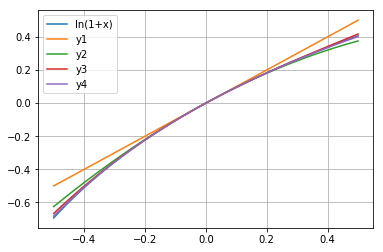

In [19]:
xs = np.linspace(-0.5,0.5,100)
y1 = xs
y2 = y1-xs**2/2
y3 = y2+xs**3/3
y4 = y3-xs**4/4
plt.plot(xs, np.log(1+xs), label='ln(1+x)')
plt.plot(xs, y1, label='y1')
plt.plot(xs, y2, label='y2')
plt.plot(xs, y3, label='y3')
plt.plot(xs, y4, label='y4')
plt.grid()
plt.legend()

2.1)If we calculate $\ln(1.5)$ using 3 **non-zero** terms, what is the bound on the **truncation error**.

In [20]:
#3 non-zero terms
x = 0.5
px = x-x**2/2+x**3/3
print(px)

#remainder term 
rx = fac(3)/(1+0)*x**4/fac(4)
print("ln(1.5)= ",math.log(1.5))
print(rx)
print(px-rx, px+rx)

0.4166666666666667
ln(1.5)=  0.4054651081081644
0.015625
0.4010416666666667 0.4322916666666667


2.2)How many **non-zero** terms do we need to calculate $\ln(1.5)$ such that the bound on **truncation error** is less than $10^{-7}$. Be sure to justify the maximum of $f^{(n+1)}(\xi)$ term.

In [21]:
def error_terms(x,n): 
    return x**(n+1)/(n+1)
x = 0.5
for i in range(1,30):
    if error_terms(x,i) < 1e-7:
        print(i)
        break

19


3) Notice that $\tan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

3.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

$
    tan\left(\frac{\pi}{4}\right) = 1\\
    \pi= 4\arctan (1)\\
    f(x) = \arctan(x)\\
    f'(x) = \frac{1}{1+x^2}\\
    f^3(x) = \frac{6x^2-2}{(1+x^2)^3} \\
    f^5(x)= \frac{24(5x^4-10x^2+1)}{(1+x^2)^5}
$

3.2) Guess the rest of the terms

$\arctan(x) = x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+\ldots = \sum_{n=1}^{\infty} (-1)^{n-1} \frac{x^{2n-1}}{2n-1} $

3.3) Calculate $\pi$ using taylor approximation for 100 **non-zero** terms. (Note I changed this to 100 terms so you must write some sort of for loop to do it).

In [22]:
def cal_arctan(x,n):
    return ((-1)**(n-1)*x**(2.*n-1)/(2*n-1))
x = 1
arctan = 0
for i in range(1,101):
    arctan+=cal_arctan(x,i)

print("arctan= ", arctan)
print("pi= ", 4*arctan)


arctan=  0.7828982258896384
pi=  3.1315929035585537


4) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

4.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$

$
f(x) = \frac{1}{1-x}\\
f'(x) = \frac{1}{(1-x)^2}\\
f''(x) = \frac{2}{(1-x)^3}\\
\frac{1}{1-x}= 1+x+x^2+x^3+\ldots = \sum_{n=0}^{\infty}x^n
$

4.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

In [23]:
#3 non-zero terms 
x = 0.2
px = 1+x+x**2
print("1/0.8= ",1/0.8)
print("3 non-zero terms =", px)

#truncation error  xi = 
rx = fac(3)/(1-0)**4*x**3/fac(3)
print("remainder term =", rx)
print(px-rx, px+rx)

1/0.8=  1.25
3 non-zero terms = 1.24
remainder term = 0.008000000000000002
1.232 1.248


5) (Optional) When Taylor series sort of doesn't work. 
$$
f(x) = \begin{cases}
e^{-1/x^2} & x \ne 0 \\
0 & x = 0
\end{cases}
$$

Find taylor series expansion of this function around $x=0$ for 5 terms. Take the limit carefully.

Did you notice something? What's happening? (Plot and Try to calculate the error term to see what is going on)